In [1]:
import glob
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"] = "none"

In [2]:
results = {}
result_files = glob.glob("../results/*.pickle")

for file in result_files:
    results[os.path.basename(file).split('.')[0]] = pickle.load(open(file, "rb"))

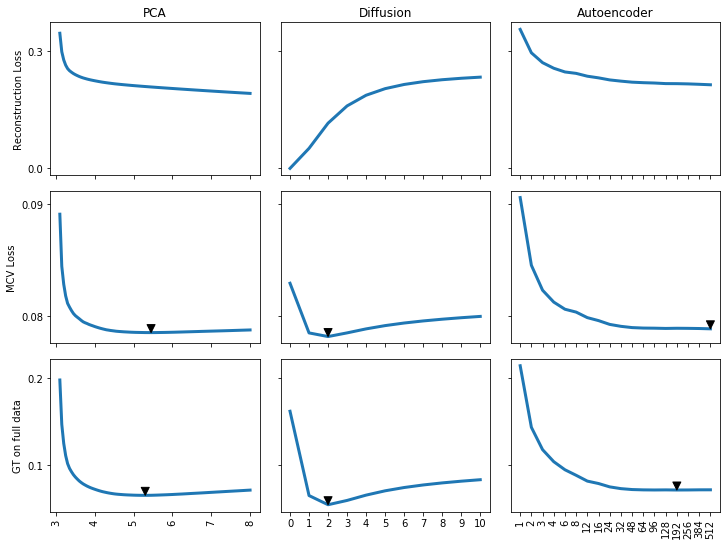

In [3]:
fig,ax = plt.subplots(
    3, 3, figsize=(12, 9), sharey="row", sharex="col",
    gridspec_kw={"wspace": 0.1, "hspace": 0.1}
)

yticks = {
    0: (0., 0.3),
    1: (0.08, 0.09),
    2: (0.1, 0.2)
}

for i,key in enumerate(("neuron_pca_mse_0", "neuron_diffusion_mse_0", "neuron_autoencoder_mse_0")):
    df = results[key]

    for j,loss in zip((0, 1, 2), ("rec_loss", "mcv_loss", "gt0_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss]
        else:
            y = df[loss].mean(0)

        if i == 0:
            x = x[1:]
            y = y[1:]
            
        if i == 0:
            ax[j,i].plot(x, y, linewidth=3)
            if j > 0:
                ax[j, i].annotate(
                    " ", 
                    (x[y.argmin()], y.min()),
                    xytext=(0, 5), 
                    textcoords="offset points", 
                    arrowprops={"headwidth": 8, "headlength": 8, "color": "k"},
                )
        else:
            ax[j,i].plot(np.arange(len(x)), y, linewidth=3)
            ax[j,i].set_xticks(np.arange(len(x)))

            if j > 0:
                ax[j, i].annotate(
                    " ",
                    (y.argmin(), y.min()),
                    xytext=(0, 5), 
                    textcoords="offset points",
                    arrowprops={"headwidth": 8, "headlength": 8, "color": "k"},
                )

        if i == 1:
            ax[j, i].set_xticklabels(x)
        else:
            ax[j, i].set_xticklabels(x, rotation="vertical", ha="center")

        ax[j, i].set_yticks(yticks[j])

for i,lbl in enumerate(("PCA", "Diffusion", "Autoencoder")):
    ax[0, i].set_title(lbl)

for j,lbl in zip((0,1,2), ("Reconstruction Loss", "MCV Loss", "GT on full data")):
    ax[j, 0].set_ylabel(lbl)

plt.savefig("../figures/Figure_1c_raw.svg")
plt.show()

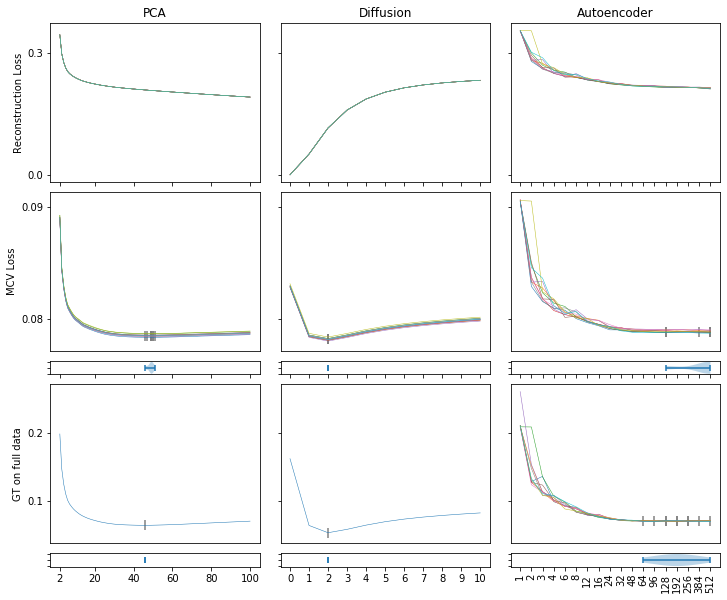

In [4]:
fig,ax = plt.subplots(
    5, 3, figsize=(12, 10), sharey="row", sharex="col",
    gridspec_kw={"wspace": 0.1, "hspace": 0.1, "height_ratios": [12, 12, 1, 12, 1]}
)

yticks = {
    0: (0., 0.3),
    1: (0.08, 0.09),
    3: (0.1, 0.2)
}

for i,key in enumerate(("neuron_pca_mse_0", "neuron_diffusion_mse_0", "neuron_autoencoder_mse_0")):
    df = results[key]

    for j,loss in zip((0, 1, 3), ("rec_loss", "mcv_loss", "gt0_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T

        if i == 0:
            x = x[1:]
            y = y[1:]
            
        if i == 0:
            ax[j,i].plot(x, y, linewidth=0.5)
            if j > 0:
                ax[j, i].tick_params(bottom=False)
                ax[j, i].scatter(x[y.argmin(0)], np.ones(y.shape[1]) * y.min(0).mean(), marker="|", s=100, color="grey")

                ax[j + 1, i].violinplot(x[y.argmin(0)], vert=False)
                ax[j + 1, i].tick_params(labelleft=False)

                ax[j + 1, i].set_xticks([2, 20, 40, 60, 80, 100])
        else:
            ax[j,i].plot(np.arange(len(x)), y, linewidth=0.5)
            ax[j,i].set_xticks(np.arange(len(x)))

            if j > 0:
                ax[j, i].tick_params(bottom=False)

                ax[j, i].scatter(y.argmin(0), np.ones(y.shape[1]) * y.min(0).mean(), marker="|", s=100, color="grey")
                ax[j + 1, i].violinplot(y.argmin(0), vert=False)
                ax[j + 1, i].tick_params(labelleft=False)

                if i == 1:
                    ax[j + 1, i].set_xticklabels(x)
                else:
                    ax[j + 1, i].set_xticklabels(x, rotation="vertical", ha="center")

        ax[j, i].set_yticks(yticks[j])

for i,lbl in enumerate(("PCA", "Diffusion", "Autoencoder")):
    ax[0, i].set_title(lbl)

for j,lbl in zip((0,1,3), ("Reconstruction Loss", "MCV Loss", "GT on full data")):
    ax[j, 0].set_ylabel(lbl)

plt.savefig("../figures/Figure_S1c_raw.svg")
plt.show()

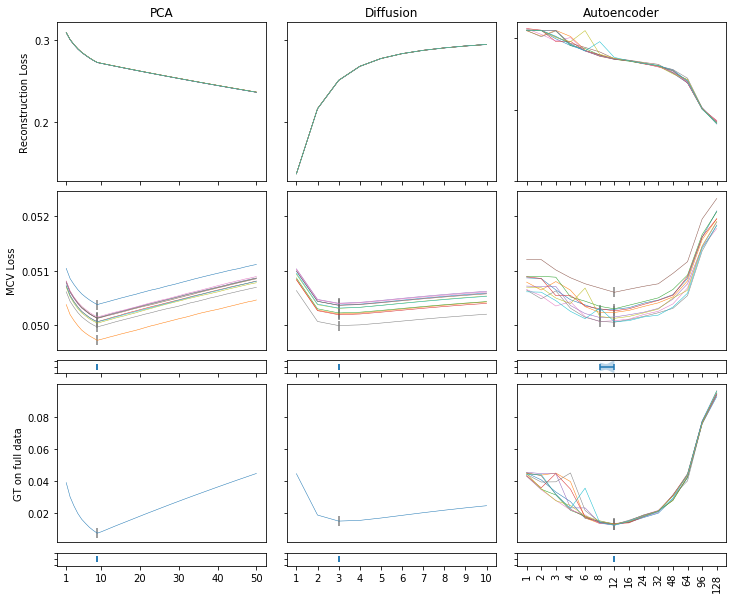

In [5]:

fig,ax = plt.subplots(
    5, 3, figsize=(12, 10), sharey="row", sharex="col",
    gridspec_kw={"wspace": 0.1, "hspace": 0.1, "height_ratios": [12, 12, 1, 12, 1]}
)

yticks = {
    0: (0.1, 0.2, 0.3),
    1: (0.05, 0.051, 0.052),
    3: (0.02, 0.04, 0.06, 0.08),
}

for i,key in enumerate(("sim_pca_mse_0", "sim_diffusion_mse_0", "sim_autoencoder_mse_0")):
    df = results[key]

    for j,loss in zip((0, 1, 3), ("rec_loss", "mcv_loss", "gt0_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T

        if i == 1:
            x = x[1:]
            y = y[1:]
            
        if i == 0:
            ax[j, i].plot(x, y, linewidth=0.5)
            if j > 0:
                ax[j, i].tick_params(bottom=False)

                ax[j, i].scatter(x[y.argmin(0)], y.min(0), marker='|', s=100, color='grey')

                ax[j+1, i].violinplot(x[y.argmin(0)], vert=False)
                ax[j+1, i].tick_params(labelleft=False)
                ax[j+1, i].set_xticks([1, 10, 20, 30, 40, 50])
        else:
            ax[j, i].plot(np.arange(len(x)), y, linewidth=0.5)
            
            ax[j, i].set_xticks(np.arange(len(x)))

            if j > 0:
                ax[j, i].tick_params(bottom=False)

                ax[j, i].scatter(y.argmin(0), y.min(0), marker='|', s=100,  color='grey')
                ax[j+1, i].violinplot(y.argmin(0), vert=False)

                ax[j+1, i].tick_params(labelleft=False)

                if i == 1:
                    ax[j+1, i].set_xticklabels(x)
                else:
                    ax[j+1, i].set_xticklabels(x, rotation="vertical", ha="center")

        ax[j,i].set_yticks(yticks[j])

for i,lbl in enumerate(("PCA", "Diffusion", "Autoencoder")):
    ax[0,i].set_title(lbl)

for j,lbl in zip((0, 1, 3), ("Reconstruction Loss", "MCV Loss", "GT on full data")):
    ax[j,0].set_ylabel(lbl)

plt.savefig('../figures/Figure_S1_raw.svg')
plt.show()

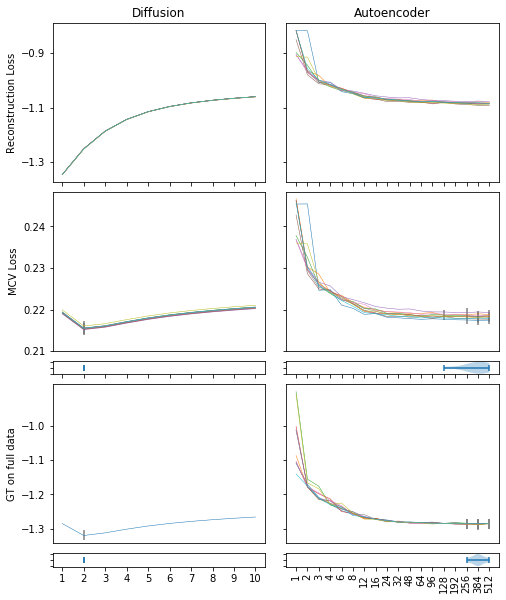

In [6]:
fig,ax = plt.subplots(
    5, 2, figsize=(8, 10), sharey="row", sharex="col", 
    gridspec_kw={"wspace": 0.1, "hspace": 0.1, "height_ratios": [12, 12, 1, 12, 1]}
)

yticks = {
    0: (-1.3, -1.1, -0.9),
    1: (0.21, 0.22, 0.23, 0.24),
    3: (-1.3, -1.2, -1.1, -1.0),
}


for i,key in enumerate(("neuron_diffusion_pois_0", "neuron_autoencoder_pois_0")):
    df = results[key]
    
    for j,loss in zip((0, 1, 3), ("rec_loss", "mcv_loss", "gt0_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T
            
        if i == 0:
            x = x[1:]
            y = y[1:]

        ax[j, i].plot(np.arange(len(x)), y, linewidth=0.5)
        ax[j, i].set_xticks(np.arange(len(x)))
        if j > 0:
            ax[j, i].tick_params(bottom=False)
            ax[j, i].scatter(y.argmin(0), y.min(0), marker="|", s=100, color="grey")

            ax[j + 1, i].violinplot(y.argmin(0), vert=False)
            ax[j + 1, i].tick_params(labelleft=False)

            if i == 0:
                ax[j + 1, i].set_xticklabels(x)
            else:
                ax[j + 1, i].set_xticklabels(x, rotation="vertical", ha="center")

        ax[j, i].set_yticks(yticks[j])

for j in (0, 1, 3):
    ymin,ymax = ax[j,0].get_ylim()
    ax[j, 0].set_ylim(min(ymin, yticks[j][0]), max(ymax, yticks[j][-1]))
        
for i,lbl in enumerate(("Diffusion", "Autoencoder")):
    ax[0,i].set_title(lbl)

for j,lbl in zip((0, 1, 3), ("Reconstruction Loss", "MCV Loss", "GT on full data")):
    ax[j,0].set_ylabel(lbl)
        
plt.savefig('../figures/Figure_S2a_raw.svg')
plt.show()

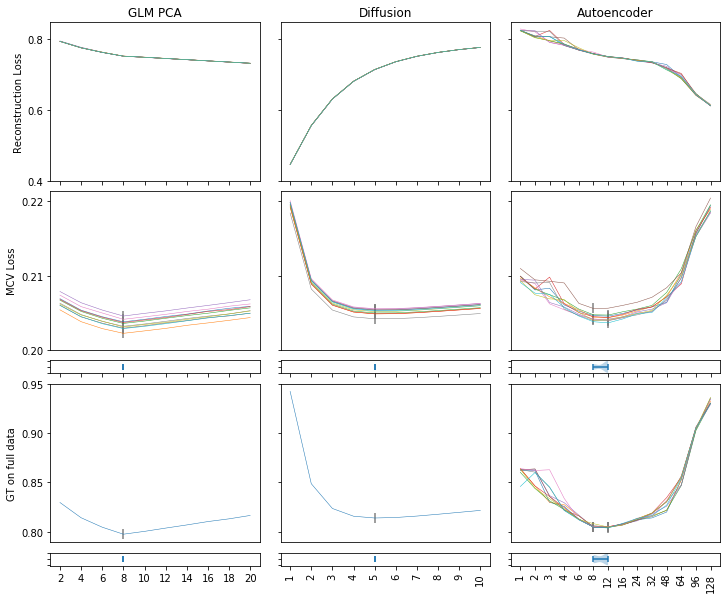

In [7]:
fig,ax = plt.subplots(
    5, 3, figsize=(12, 10), sharey="row", sharex="col", 
    gridspec_kw={"wspace": 0.1, "hspace": 0.1, "height_ratios": [12, 12, 1, 12, 1]}
)

yticks = {
    0: (0.4, 0.6, 0.8),
    1: (0.2, 0.21, 0.22),
    3: (0.8, 0.85, 0.9, 0.95),
}


for i,key in enumerate(("sim_glmpca_0", "sim_diffusion_pois_0", "sim_autoencoder_pois_0")):
    df = results[key]
    
    for j,loss in zip((0, 1, 3), ("rec_loss", "mcv_loss", "gt0_loss")):
        x = df["param_range"].copy()

        if df[loss].ndim == 1:
            y = df[loss][:, None]
        else:
            y = df[loss].T
            
        if i == 1:
            x = x[1:]
            y = y[1:]


        ax[j,i].plot(np.arange(len(x)), y, linewidth=0.5)
        ax[j,i].set_xticks(np.arange(len(x)))
        if j > 0:
            ax[j, i].tick_params(bottom=False)
            ax[j, i].scatter(y.argmin(0), y.min(0), marker="|", s=100, color="grey")

            ax[j + 1, i].violinplot(y.argmin(0), vert=False)
            ax[j + 1, i].tick_params(labelleft=False)

            if i == 0:
                ax[j + 1, i].set_xticklabels(x)
            else:
                ax[j + 1, i].set_xticklabels(x, rotation="vertical", ha="center")

        ax[j,i].set_yticks(yticks[j])

for j in (0, 1, 3):
    ymin,ymax = ax[j,0].get_ylim()
    ax[j,0].set_ylim(min(ymin, yticks[j][0]), max(ymax, yticks[j][-1]))
        
for i,lbl in enumerate(("GLM PCA", "Diffusion", "Autoencoder")):
    ax[0,i].set_title(lbl)

for j,lbl in zip((0, 1, 3), ("Reconstruction Loss", "MCV Loss", "GT on full data")):
    ax[j,0].set_ylabel(lbl)
        
plt.savefig('../figures/Figure_S2b_raw.svg')
plt.show()